In [1]:
import tensorflow as tf
import numpy as np
import my_func as mf
import matplotlib.pyplot as plt
import random

### Load the dataset
The training data and testing data have been flattened into m by n matrices, where m is the number of samples, and n number of features. Note that the dummy 1 has been added to the last column of train_data and test_data, so that the bias can be combined with the weight matrix.

In [2]:
train_data = np.loadtxt('my_train_data.txt', np.float32)
test_data = np.loadtxt('my_test_data.txt', np.float32)
train_label = np.loadtxt('my_train_label.txt', np.float32)
test_label = np.loadtxt('my_test_label.txt', np.float32)

In [3]:
hm_train_data = 25112
hm_test_data = 4982
hm_classes = 5
train_data /= 255
test_data /= 255
train_data = np.hstack((train_data, np.ones((hm_train_data, 1), dtype=np.float32)))
test_data = np.hstack((test_data, np.ones((hm_test_data, 1), dtype=np.float32)))
feature_dim = int(28 * 28) + 1

### Setup hyperparams for training the regressor 

In [4]:
learning_rate = 0.0008
learning_epoch = 20
eval_interval = 20
batch_size = 50
reg_lambda = 0.005

In [5]:
x = tf.placeholder(tf.float32, shape=(None, feature_dim))
y = tf.placeholder(tf.float32, shape=(None, hm_classes))
weights = tf.Variable(tf.truncated_normal([feature_dim, hm_classes], 0.1, 0.01) / 10)
w = np.zeros([feature_dim, hm_classes], dtype=np.float32)
track_train_loss = np.array([])
track_test_loss = np.array([])

### Define the computational operation for the multi-class logistic regressor
#### Compute the mean squared loss (Negative Conditional Log-likelihood)

In [6]:
train_loss = mf.compute_loss(weights, train_data, train_label, reg_lambda) / hm_train_data
test_loss = mf.compute_loss(weights, test_data, test_label, reg_lambda) / hm_test_data

#### Compute the training and testing accuracy

In [7]:
soft_prob, _ = mf.compute_softmax(weights, x)
correct = tf.equal(tf.argmax(soft_prob, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(correct, 'float'))

#### Compute the gradient and update the weights

In [8]:
grads = mf.compute_gradients(weights, x, y, reg_lambda)
weights = tf.assign_sub(weights, learning_rate * grads)

In [9]:
# sess.close()

### Initilize a session, and starting training

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for s in np.arange(learning_epoch):   
    
    # compute the initial training, testing loss and accuracy
    if s == 0:
        trl, tel = sess.run([train_loss, test_loss])
        tr_acc = sess.run([acc], feed_dict={x: train_data, y: train_label})
        te_acc = sess.run([acc], feed_dict={x: test_data, y: test_label})
        print('iteration', s)
        print('training loss:', trl, ', training accuracy:', tr_acc)
        print('testing loss', tel, 'test accuracy is', te_acc)
        
        track_train_loss = np.hstack((track_train_loss, trl))
        track_test_loss = np.hstack((track_test_loss, tel))
    
    # decay the learning rate every epoch
    print('Epoch: ', s + 1)
    learning_rate *= 0.8
    
    re_order = np.random.permutation(hm_train_data)
    for i in np.arange(int(np.floor(hm_train_data / batch_size))):
            batch_x = train_data[re_order[i * batch_size:(i + 1) * batch_size], :]
            batch_y = train_label[re_order[i * batch_size:(i + 1) * batch_size], :]
            
            # stochastic gradient descent method
            w = sess.run([weights], feed_dict={x: batch_x, y: batch_y})
            
            if i % eval_interval == 5:
                trl, tel = sess.run([train_loss, test_loss])
                tr_acc = sess.run([acc], feed_dict={x: train_data, y: train_label})
                te_acc = sess.run([acc], feed_dict={x: test_data, y: test_label})
                print('iteration', i)
                print('training loss:', trl, ', training accuracy:', tr_acc)
                print('testing loss', tel, 'test accuracy is', te_acc)
        
                track_train_loss = np.hstack((track_train_loss, trl))
                track_test_loss = np.hstack((track_test_loss, tel))

    
    
    

iteration 0
training loss: 1.60932 , training accuracy: [0.20097961]
testing loss 1.60929 test accuracy is [0.21336812]
Epoch:  1
iteration 5
training loss: 1.2883 , training accuracy: [0.76756132]
testing loss 1.2748 test accuracy is [0.78181452]
iteration 25
training loss: 0.773426 , training accuracy: [0.84644789]
testing loss 0.746706 test accuracy is [0.86872745]
iteration 45
training loss: 0.591793 , training accuracy: [0.87229216]
testing loss 0.559804 test accuracy is [0.89160979]
iteration 65
training loss: 0.501564 , training accuracy: [0.89072955]
testing loss 0.467507 test accuracy is [0.91208351]
iteration 85
training loss: 0.446022 , training accuracy: [0.9031539]
testing loss 0.411507 test accuracy is [0.92211962]
iteration 105
training loss: 0.409042 , training accuracy: [0.90554315]
testing loss 0.375782 test accuracy is [0.92372543]
iteration 125
training loss: 0.383343 , training accuracy: [0.90996337]
testing loss 0.350141 test accuracy is [0.92352468]
iteration 145

iteration 345
training loss: 0.197673 , training accuracy: [0.94190031]
testing loss 0.18437 test accuracy is [0.94520271]
iteration 365
training loss: 0.196967 , training accuracy: [0.94201976]
testing loss 0.184006 test accuracy is [0.94540346]
iteration 385
training loss: 0.196648 , training accuracy: [0.94126314]
testing loss 0.184504 test accuracy is [0.94379765]
iteration 405
training loss: 0.196405 , training accuracy: [0.94178081]
testing loss 0.184006 test accuracy is [0.94439983]
iteration 425
training loss: 0.195415 , training accuracy: [0.94257724]
testing loss 0.182854 test accuracy is [0.94520271]
iteration 445
training loss: 0.195575 , training accuracy: [0.94233835]
testing loss 0.183037 test accuracy is [0.94520271]
iteration 465
training loss: 0.195238 , training accuracy: [0.94233835]
testing loss 0.182878 test accuracy is [0.94480127]
iteration 485
training loss: 0.194411 , training accuracy: [0.94273657]
testing loss 0.182378 test accuracy is [0.94480127]
Epoch:  4

iteration 185
training loss: 0.177828 , training accuracy: [0.94632047]
testing loss 0.170678 test accuracy is [0.9474107]
iteration 205
training loss: 0.177599 , training accuracy: [0.94679832]
testing loss 0.169534 test accuracy is [0.94861501]
iteration 225
training loss: 0.17735 , training accuracy: [0.94659925]
testing loss 0.170103 test accuracy is [0.94781214]
iteration 245
training loss: 0.177195 , training accuracy: [0.9464798]
testing loss 0.169079 test accuracy is [0.94801283]
iteration 265
training loss: 0.176745 , training accuracy: [0.94675851]
testing loss 0.168799 test accuracy is [0.94761139]
iteration 285
training loss: 0.176868 , training accuracy: [0.94659925]
testing loss 0.169277 test accuracy is [0.94801283]
iteration 305
training loss: 0.176343 , training accuracy: [0.94624084]
testing loss 0.16925 test accuracy is [0.94720995]
iteration 325
training loss: 0.176051 , training accuracy: [0.94675851]
testing loss 0.168592 test accuracy is [0.94720995]
iteration 34

iteration 65
training loss: 0.168484 , training accuracy: [0.94906819]
testing loss 0.163418 test accuracy is [0.94881576]
iteration 85
training loss: 0.167747 , training accuracy: [0.94926727]
testing loss 0.163484 test accuracy is [0.94861501]
iteration 105
training loss: 0.167772 , training accuracy: [0.94902837]
testing loss 0.164231 test accuracy is [0.94781214]
iteration 125
training loss: 0.167544 , training accuracy: [0.94950622]
testing loss 0.164352 test accuracy is [0.9492172]
iteration 145
training loss: 0.167559 , training accuracy: [0.94946641]
testing loss 0.164215 test accuracy is [0.94781214]
iteration 165
training loss: 0.167408 , training accuracy: [0.94958586]
testing loss 0.163772 test accuracy is [0.94981933]
iteration 185
training loss: 0.167566 , training accuracy: [0.94986463]
testing loss 0.164378 test accuracy is [0.9492172]
iteration 205
training loss: 0.167404 , training accuracy: [0.94962567]
testing loss 0.164264 test accuracy is [0.94841427]
iteration 22

iteration 405
training loss: 0.162811 , training accuracy: [0.95062119]
testing loss 0.161629 test accuracy is [0.9492172]
iteration 425
training loss: 0.162623 , training accuracy: [0.9497053]
testing loss 0.1607 test accuracy is [0.94941789]
iteration 445
training loss: 0.163721 , training accuracy: [0.95046192]
testing loss 0.161244 test accuracy is [0.94801283]
iteration 465
training loss: 0.162259 , training accuracy: [0.95105928]
testing loss 0.16009 test accuracy is [0.9492172]
iteration 485
training loss: 0.161787 , training accuracy: [0.95125836]
testing loss 0.159468 test accuracy is [0.95062226]
Epoch:  12
iteration 5
training loss: 0.162415 , training accuracy: [0.95062119]
testing loss 0.160627 test accuracy is [0.9492172]
iteration 25
training loss: 0.164277 , training accuracy: [0.94954604]
testing loss 0.162485 test accuracy is [0.94961864]
iteration 45
training loss: 0.161336 , training accuracy: [0.95113891]
testing loss 0.159474 test accuracy is [0.95082295]
iteratio

iteration 285
training loss: 0.158283 , training accuracy: [0.95181584]
testing loss 0.157985 test accuracy is [0.94941789]
iteration 305
training loss: 0.15749 , training accuracy: [0.95269191]
testing loss 0.157585 test accuracy is [0.95042151]
iteration 325
training loss: 0.157796 , training accuracy: [0.95225388]
testing loss 0.157218 test accuracy is [0.95002007]
iteration 345
training loss: 0.157997 , training accuracy: [0.95233357]
testing loss 0.157335 test accuracy is [0.94981933]
iteration 365
training loss: 0.157615 , training accuracy: [0.95261228]
testing loss 0.15733 test accuracy is [0.95002007]
iteration 385
training loss: 0.157588 , training accuracy: [0.95237339]
testing loss 0.157382 test accuracy is [0.9510237]
iteration 405
training loss: 0.157591 , training accuracy: [0.95209461]
testing loss 0.157676 test accuracy is [0.9510237]
iteration 425
training loss: 0.15774 , training accuracy: [0.95213443]
testing loss 0.157483 test accuracy is [0.95062226]
iteration 445

iteration 165
training loss: 0.155124 , training accuracy: [0.95281142]
testing loss 0.156893 test accuracy is [0.95162582]
iteration 185
training loss: 0.155041 , training accuracy: [0.95253265]
testing loss 0.15692 test accuracy is [0.95122439]
iteration 205
training loss: 0.154272 , training accuracy: [0.95376712]
testing loss 0.155729 test accuracy is [0.95202732]
iteration 225
training loss: 0.154483 , training accuracy: [0.95360786]
testing loss 0.15523 test accuracy is [0.95082295]
iteration 245
training loss: 0.154613 , training accuracy: [0.95396626]
testing loss 0.155872 test accuracy is [0.95182657]
iteration 265
training loss: 0.154312 , training accuracy: [0.95376712]
testing loss 0.155524 test accuracy is [0.95242876]
iteration 285
training loss: 0.154485 , training accuracy: [0.95344853]
testing loss 0.156178 test accuracy is [0.95082295]
iteration 305
training loss: 0.154176 , training accuracy: [0.95352817]
testing loss 0.155206 test accuracy is [0.95082295]
iteration 

iteration 45
training loss: 0.152518 , training accuracy: [0.95388657]
testing loss 0.154726 test accuracy is [0.9510237]
iteration 65
training loss: 0.1519 , training accuracy: [0.95408571]
testing loss 0.154333 test accuracy is [0.95122439]
iteration 85
training loss: 0.151899 , training accuracy: [0.95404589]
testing loss 0.154753 test accuracy is [0.95022082]
iteration 105
training loss: 0.152787 , training accuracy: [0.95364767]
testing loss 0.155066 test accuracy is [0.9510237]
iteration 125
training loss: 0.151789 , training accuracy: [0.95424497]
testing loss 0.154794 test accuracy is [0.95162582]
iteration 145
training loss: 0.152117 , training accuracy: [0.95364767]
testing loss 0.155145 test accuracy is [0.95222801]
iteration 165
training loss: 0.151599 , training accuracy: [0.95416534]
testing loss 0.154762 test accuracy is [0.95182657]
iteration 185
training loss: 0.15156 , training accuracy: [0.95436442]
testing loss 0.154818 test accuracy is [0.95182657]
iteration 205
tr

### Plot the weights as an image

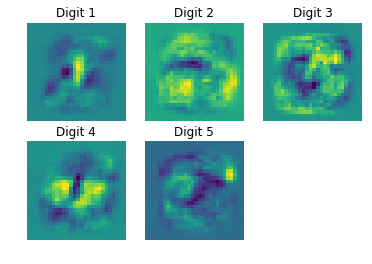

In [11]:
plt.figure(1)
plt.subplot(231)
img = w[0][0:28*28, 0].reshape(28,28)
plt.imshow(img)
plt.title('Digit 1')
plt.axis('off')

plt.subplot(232)
img = w[0][0:28*28, 1].reshape(28,28)
plt.imshow(img)
plt.title('Digit 2')
plt.axis('off')

plt.subplot(233)
img = w[0][0:28*28, 2].reshape(28,28)
plt.imshow(img)
plt.title('Digit 3')
plt.axis('off')

plt.subplot(234)
img = w[0][0:28*28, 3].reshape(28,28)
plt.imshow(img)
plt.title('Digit 4')
plt.axis('off')

plt.subplot(235)
img = w[0][0:28*28, 4].reshape(28,28)
plt.imshow(img)
plt.title('Digit 5')
plt.axis('off')


plt.show()

### Compute the final classification accuracy for each digit

In [12]:
for i in np.arange(5):
    rows, _ = np.nonzero(test_label[:, i][:, None])
    exp_terms = np.exp(np.dot(test_data[rows, :], w[0]))
    prob = exp_terms / np.sum(exp_terms, axis=1, keepdims=True)
    max_ind = np.argmax(prob, axis=1)
    one_hot_max = np.zeros([np.size(rows), hm_classes])
    for j in np.arange(np.size(rows)):
        one_hot_max[j, int(max_ind[j])] = 1
        
    error_rate = np.count_nonzero(one_hot_max - test_label[rows, :]) / (2 * np.size(rows))
    print('Digit', i + 1, 'testing accuracy:', 1 - error_rate)

Digit 1 testing accuracy: 0.9859022556390977
Digit 2 testing accuracy: 0.9444444444444444
Digit 3 testing accuracy: 0.9378640776699029
Digit 4 testing accuracy: 0.9735503560528993
Digit 5 testing accuracy: 0.9114754098360656


### Plot the learning curves w.r.t. the training and testing loss

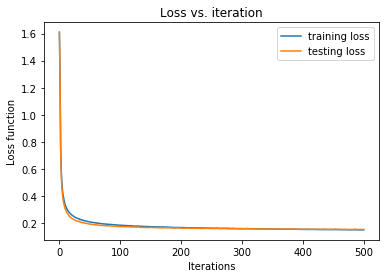

In [13]:
xl = np.arange(np.size(track_train_loss))
plt.plot(xl, track_train_loss, label='training loss')
plt.plot(xl, track_test_loss, label='testing loss')
plt.title('Loss vs. iteration')

plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.legend()
plt.show()

### Save the weights for evaluation in the desired format

In [14]:
import pickle
filehandler = open("multiclass_parameters.txt","wb")
pickle.dump(w[0], filehandler)
filehandler.close()